# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint
## Not for grades

The objective of this experiment is to understand Decision tree classifier.

### Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P19A06E_test" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "981234567" #@param {type:"string"}


In [3]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="BLR_M1W2_SUN_DL_1" #name of the notebook

def setup():
    ipython.magic("sx apt-get install graphviz")
    ipython.magic("sx pip install graphviz") 
    print ("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "id" : Id, "file_hash" : file_hash, "notebook" : notebook}

      r = requests.post(url, data = data)
      print("Your submission is successful. Ref:", submission_id)
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing Required Packages

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import os
from sklearn.decomposition import PCA

#### Loading the data

In [5]:
# Load data
iris = load_iris()
print(type(iris))
print(iris.keys())
print(type(iris.data))
print(set(iris.target))

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
<class 'numpy.ndarray'>
{0, 1, 2}


In [6]:
print(iris.data[::15])
print(iris.target[::15])

[[5.1 3.5 1.4 0.2]
 [5.7 4.4 1.5 0.4]
 [4.8 3.1 1.6 0.2]
 [4.8 3.  1.4 0.3]
 [5.  2.  3.5 1. ]
 [6.6 3.  4.4 1.4]
 [5.5 2.6 4.4 1.2]
 [7.6 3.  6.6 2.1]
 [6.9 3.2 5.7 2.3]
 [7.7 3.  6.1 2.3]]
[0 0 0 0 1 1 1 2 2 2]


In [0]:
def Process_data(X, compress=False, n_components=4):
  if compress:
    pca = PCA(n_components=n_components)
    pca.fit(X)
    compressed_list =pca.transform(X)
    return compressed_list
  return X

In [0]:
X, y = Process_data(iris.data, compress=True, n_components=2), iris.target

#### Training a  Classifier

In [0]:
for depth in range(2, 7):
    clf = DecisionTreeClassifier(max_depth = depth)
    # Fitting the data
    clf.fit(iris.data, iris.target)
    saveAs = "iris_dt_" + str(depth)
    save_dot = saveAs + ".dot"
    save_png = saveAs + ".png"
    # Exporting the model into a dot file
    graph = graphviz.Source(export_graphviz(clf, out_file=save_dot
       , class_names=['0', '1', '2'] 
       , filled = True))
    os.system("dot -T png -o " + save_png + " " + save_dot)

Now let us see how the tree looks at each depth

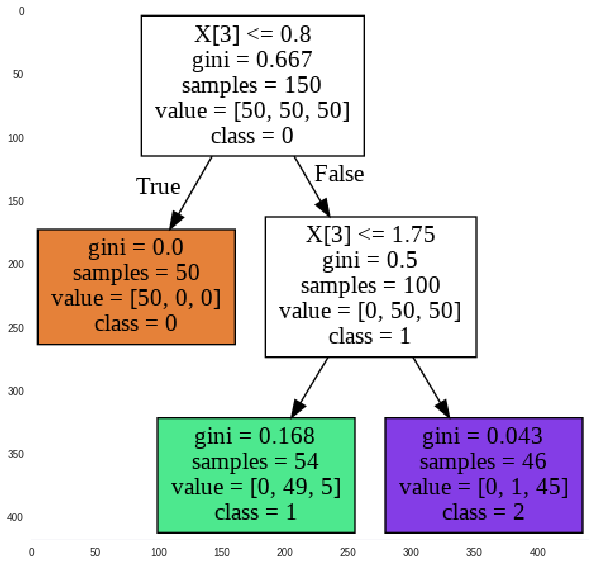

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(plt.imread("iris_dt_2.png"))
plt.grid(False)

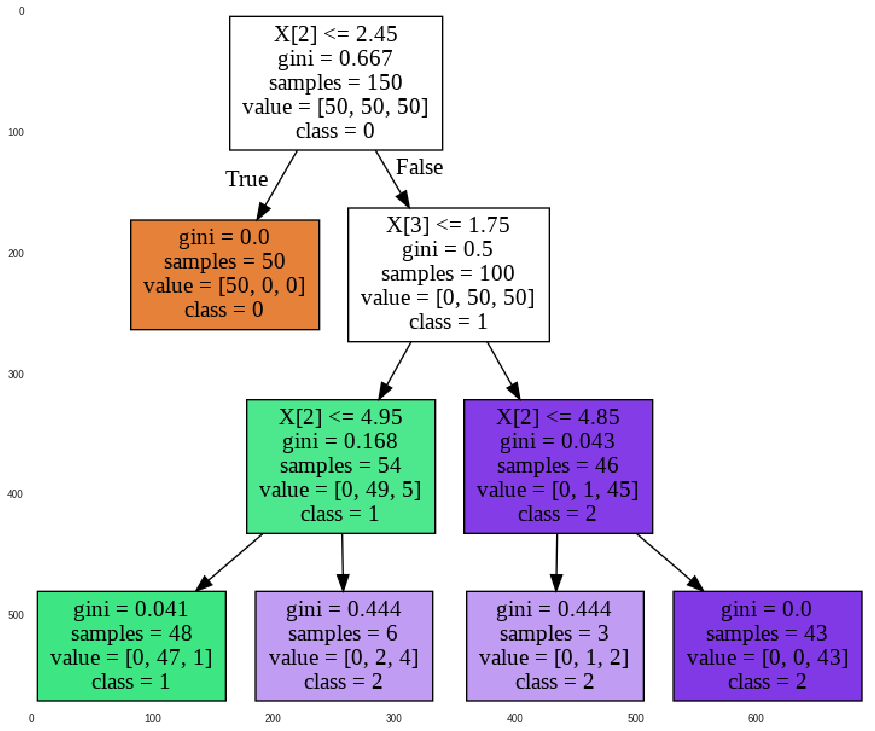

In [43]:
plt.figure(figsize=(15,15))
plt.imshow(plt.imread("iris_dt_3.png"))
plt.grid(False)

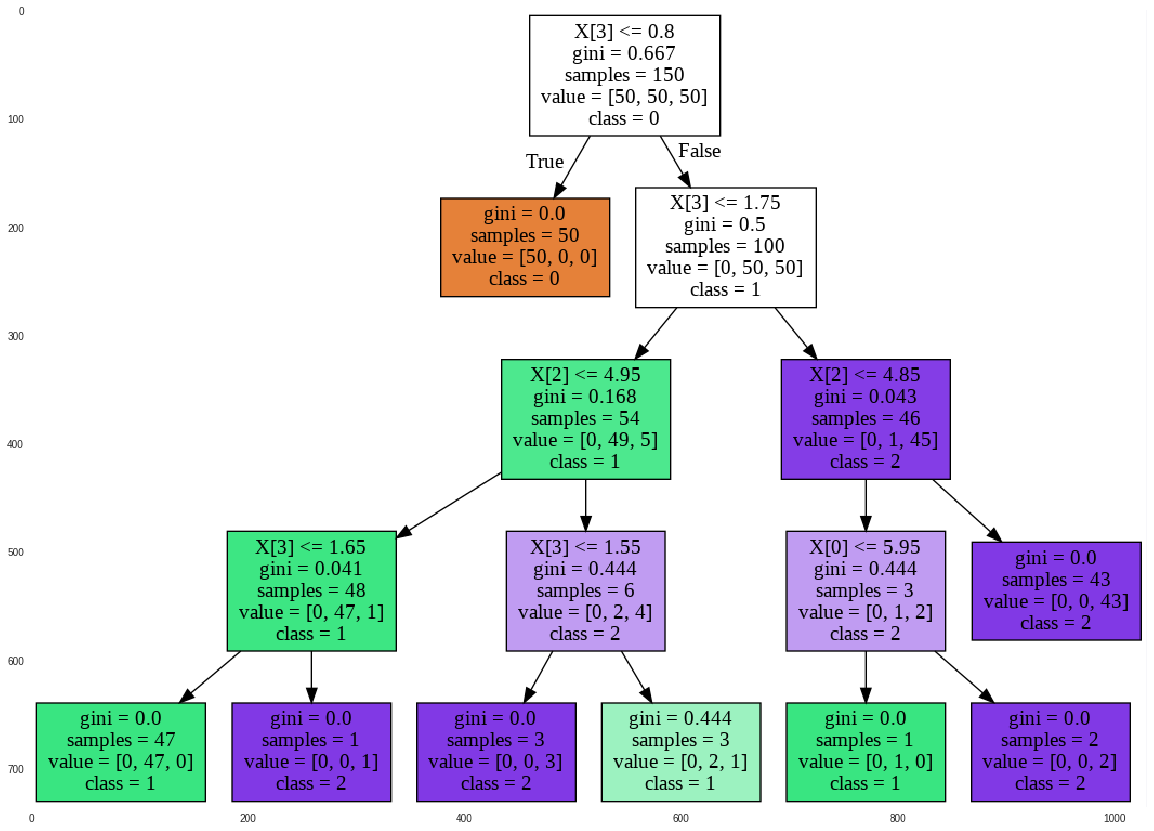

In [44]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread("iris_dt_4.png"))
plt.grid(False)

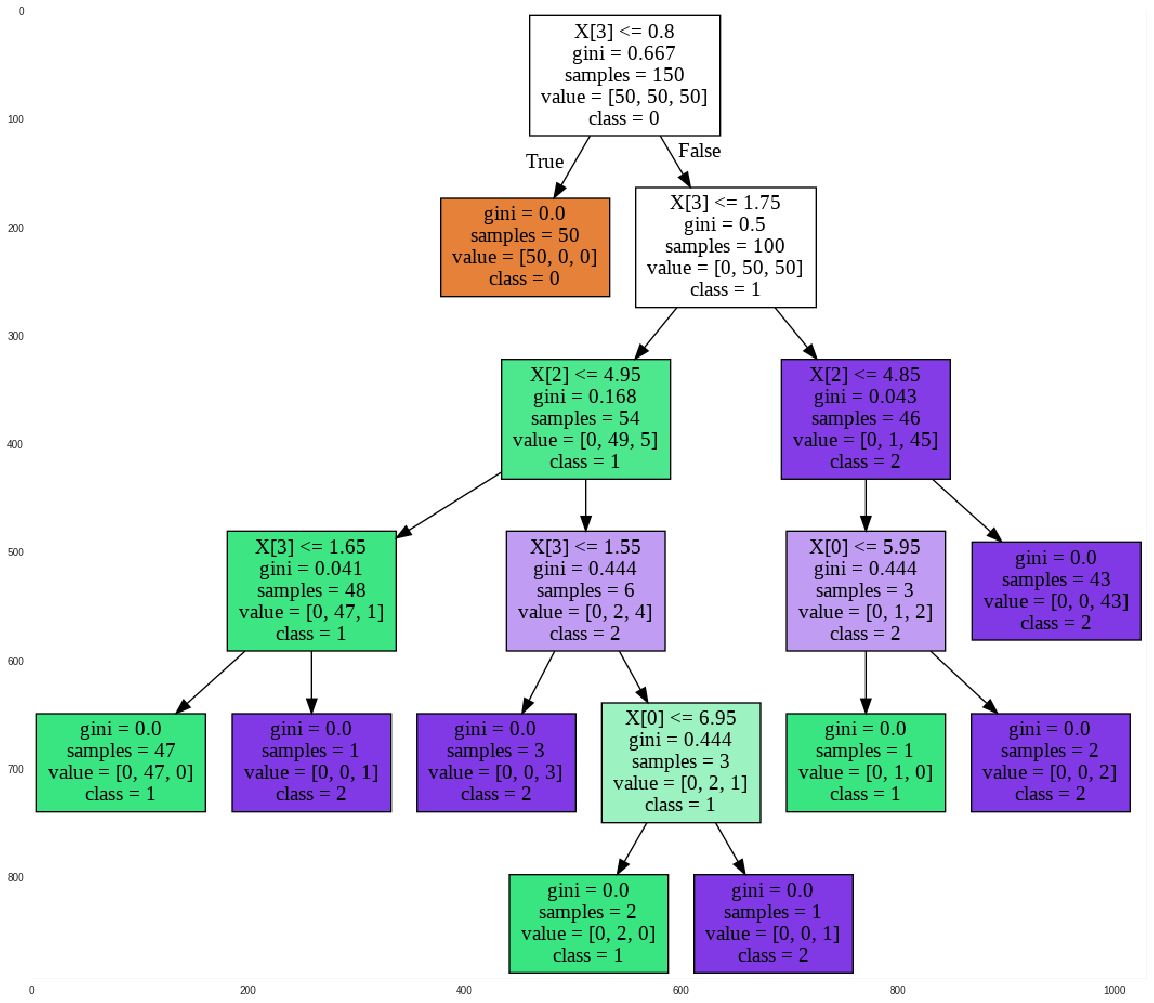

In [45]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread("iris_dt_5.png"))
plt.grid(False)

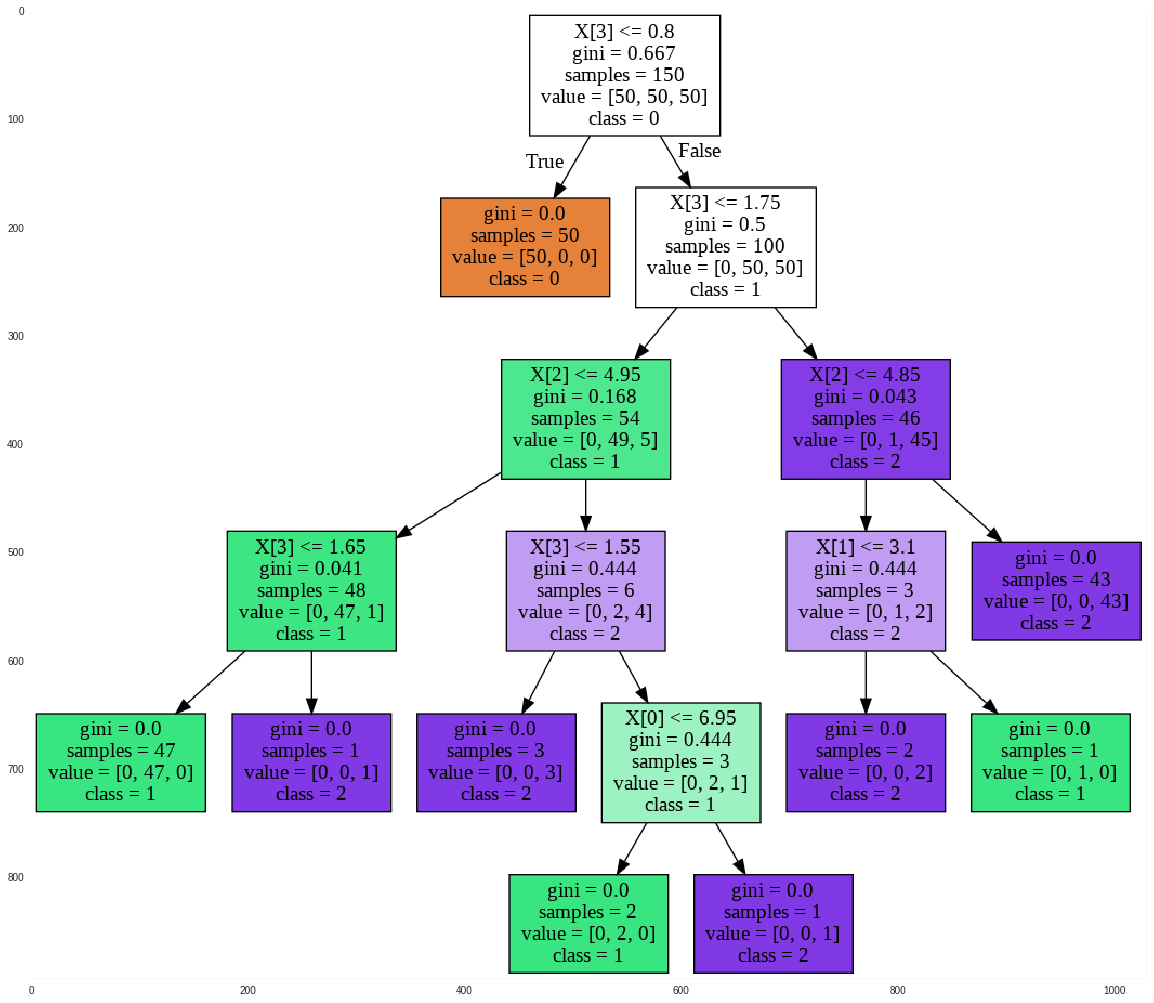

In [46]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread("iris_dt_6.png"))
plt.grid(False)

### Please answer the questions below to complete the experiment:

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Too Simple, I am wasting time" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "test" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")